In [1]:
%load_ext autoreload
%autoreload 2
import torch
import pickle
import numpy as np
import pylab as plt
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import torch.nn as nn
from utils.gaussian_random_field import *
from utils.visualizations import *
from models.generator import *
from models.discriminator import *
from train import train_GANO_HM
import gc
from neuralop.layers.fno_block import FNOBlocks

In [2]:
torch.cuda.set_device(0)
device = 'cuda:0'

In [3]:
res = 10 #resolution
npad = 5  # padding of latio 8/128 in U-NO
ntrain = 5000 # number of training samples
modes = 20 # number of Fourier modes in the initial FNO layer
n_feat = 5 # number of fourier features added. (each feature has sin and cos channel, so total 2*n_feat extra channels)
grf_codim = 120 # grf codim.
joints_info_dim = 165 # total dimensions required to represent joints data.

d_co_domain = 400 #
lr = 1e-4 #learning rate of the optimizer
epochs = 10
λ_grad = 1.0 # Lagrange coefficinet for gradient penalty
n_critic = 10 # every n_critic iteration the generator is updated
batch_size = 10
n_frames = 300

In [50]:
grf = Gaussian_RF(1, 300, alpha=1.5, tau=5, sigma=2, codim = 120, device=device)
s = grf.sample(10,300)
print(s.shape)

torch.Size([10, 300, 120])


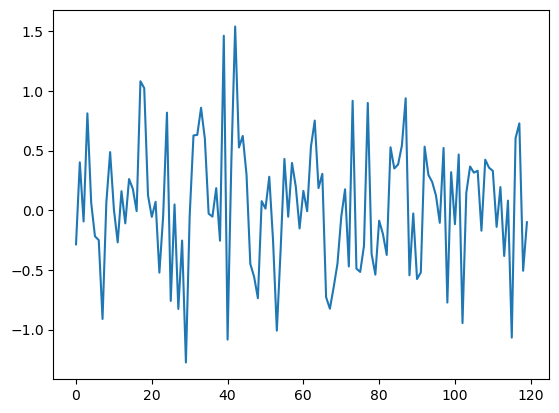

In [65]:
import matplotlib.pyplot as plt
s = grf.sample(10,300)
plt.plot(s[0,4,:].cpu())
plt.show()

In [5]:
G = cGenerator_HM(grf_codim + joints_info_dim + 2*n_feat, d_co_domain, out_channels=joints_info_dim,n_feat=n_feat, modes=modes, pad=npad).to(device).float()

In [6]:
D = cDiscriminator_HM(joints_info_dim + joints_info_dim + 2*n_feat, d_co_domain, n_feat=n_feat, modes=modes, pad=npad).to(device).float()

In [7]:
x = torch.rand((batch_size, n_frames, grf_codim)).to(device)
c = torch.rand((batch_size, n_frames, joints_info_dim)).to(device)
gen_out = G(x, c)
print(gen_out.shape)

torch.Size([10, 300, 165])


In [8]:
x = torch.rand((batch_size, n_frames, joints_info_dim)).to(device)
c = x = torch.rand((batch_size, n_frames, joints_info_dim)).to(device)
dis_out = D(x, c)
print(dis_out.shape)

torch.Size([10, 1])


### Ignore below this

In [1]:
import torch
import numpy as np

In [5]:
train_data = [(np.random.rand(300, 187), np.random.rand(300, 187)) for _ in range(100)]
test_data = [(np.random.rand(300, 187), np.random.rand(300, 187)) for _ in range(20)]

In [7]:
import pickle

In [8]:
with open('data/train_data_smplx_random.pkl', 'wb') as file:
    pickle.dump(train_data, file)

In [9]:
with open('data/test_data_smplx_random.pkl', 'wb') as file:
    pickle.dump(test_data, file)